In [60]:
!pip install kaggle


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
import os
import kaggle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [66]:
os.environ['KAGGLE_USERNAME'] = "naruto2324" # username from the json file
os.environ['KAGGLE_KEY'] =  "dfce6262d4320a3de32eb2ffca7e0862"# key from the json file

In [67]:
kaggle_dataset_id ='omkargurav/face-mask-dataset'
destination_path = 'C:\\Users\\niraj\\PycharmProjects\\mask detection'

# Download the dataset
kaggle.api.dataset_download_files(kaggle_dataset_id, path=destination_path, unzip=True)


In [68]:
with_mask_files = os.listdir('C:\\Users\\niraj\\PycharmProjects\\mask detection\\data\\with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [69]:
without_mask_files = os.listdir('C:\\Users\\niraj\\PycharmProjects\\mask detection\\data\\without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [70]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask --> 1

without mask --> 0

In [71]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [72]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [73]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [74]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [75]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

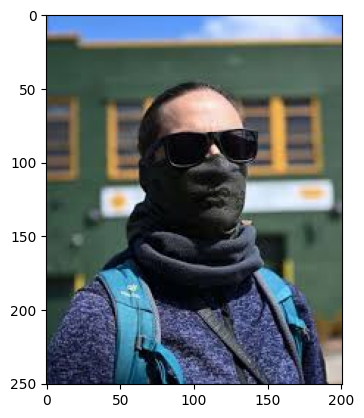

In [112]:
# display the images
img = mpimg.imread('C:\\Users\\niraj\\PycharmProjects\\mask detection\\data\\with_mask\\with_mask_1.jpg')
imgplot = plt.imshow(img)


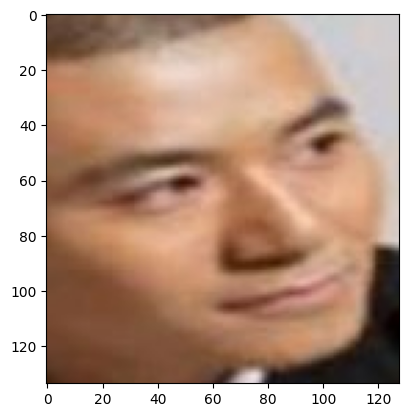

In [111]:
img = mpimg.imread('C:\\Users\\niraj\\PycharmProjects\\mask detection\\data\\without_mask\\without_mask_1.jpg')
imgplot = plt.imshow(img)


**Image Processing**


Resize the Images

Convert the images to numpy arrays

In [114]:
# convert the images to numpy arrays
with_mask_path = 'C:\\Users\\niraj\\PycharmProjects\\mask detection\\data\\with_mask\\'
data = []
for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = 'C:\\Users\\niraj\\PycharmProjects\\mask detection\\data\\without_mask\\'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [115]:
type(data)

list

In [116]:
len(data)

7553

In [117]:
data[0]

array([[[ 48,  57,  34],
        [ 63,  62,  39],
        [ 51,  54,  29],
        ...,
        [101,  64,  32],
        [ 40,  42,  27],
        [ 30,  37,  23]],

       [[ 50,  58,  37],
        [ 55,  55,  27],
        [ 41,  40,  19],
        ...,
        [133,  79,  45],
        [ 58,  48,  23],
        [ 19,  25,  17]],

       [[ 51,  57,  40],
        [ 44,  44,  27],
        [ 31,  32,  13],
        ...,
        [105,  64,  40],
        [ 65,  54,  29],
        [ 27,  21,  10]],

       ...,

       [[ 82,  90,  55],
        [ 79,  91,  50],
        [ 71,  83,  48],
        ...,
        [ 11,  13,  10],
        [ 19,  21,  13],
        [ 32,  36,  27]],

       [[ 70,  80,  43],
        [ 70,  82,  46],
        [ 65,  78,  50],
        ...,
        [ 12,  14,   8],
        [  9,   9,   6],
        [ 26,  25,  20]],

       [[ 57,  69,  36],
        [ 59,  66,  42],
        [ 59,  67,  46],
        ...,
        [ 23,  20,   7],
        [ 15,  15,  12],
        [ 16,  11,  10]]

In [118]:
type(data[0])

numpy.ndarray

In [119]:
data[0].shape

(64, 64, 3)

In [120]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [121]:
type(X)
type(Y)

numpy.ndarray

In [122]:
print(X.shape)
print(Y.shape)

(7553, 64, 64, 3)
(7553,)


In [123]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [125]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 64, 64, 3) (6042, 64, 64, 3) (1511, 64, 64, 3)


In [126]:
#scale the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [127]:
X_train[0]

array([[[213, 217, 200],
        [198, 194, 185],
        [161, 155, 150],
        ...,
        [184, 191, 183],
        [189, 187, 175],
        [171, 177, 147]],

       [[216, 214, 218],
        [205, 202, 201],
        [163, 160, 150],
        ...,
        [191, 192, 195],
        [188, 184, 185],
        [188, 183, 180]],

       [[223, 219, 212],
        [215, 216, 205],
        [159, 162, 151],
        ...,
        [192, 198, 193],
        [179, 186, 171],
        [180, 186, 172]],

       ...,

       [[164, 188, 204],
        [172, 190, 215],
        [172, 186, 217],
        ...,
        [104, 102,  70],
        [122, 118,  75],
        [125, 116,  79]],

       [[161, 182, 199],
        [171, 190, 206],
        [176, 192, 219],
        ...,
        [101, 106,  76],
        [106, 111,  80],
        [107, 113,  85]],

       [[164, 188, 208],
        [177, 194, 213],
        [167, 194, 209],
        ...,
        [ 99, 108,  63],
        [ 99, 106,  70],
        [ 94,  95,  55]]

In [92]:
X_train_scaled[0]

array([[[0.88627451, 0.91764706, 0.78823529],
        [0.82745098, 0.84705882, 0.7372549 ],
        [0.7372549 , 0.7372549 , 0.6627451 ],
        ...,
        [0.72941176, 0.70980392, 0.64705882],
        [0.70196078, 0.68627451, 0.58823529],
        [0.65098039, 0.70980392, 0.53333333]],

       [[0.87843137, 0.89411765, 0.85490196],
        [0.78823529, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75294118],
        ...,
        [0.77254902, 0.74509804, 0.71372549],
        [0.68627451, 0.66666667, 0.6       ],
        [0.63529412, 0.70588235, 0.56078431]],

       [[0.80392157, 0.8       , 0.83137255],
        [0.86666667, 0.8627451 , 0.88627451],
        [0.76470588, 0.75294118, 0.76862745],
        ...,
        [0.71764706, 0.68235294, 0.67843137],
        [0.6745098 , 0.65490196, 0.62352941],
        [0.70980392, 0.78039216, 0.67058824]],

       ...,

       [[0.61176471, 0.69019608, 0.77254902],
        [0.62352941, 0.70588235, 0.76862745],
        [0.64313725, 0

**Building a Convolutional Neural Networks (CNN)**

In [128]:
import tensorflow as tf
from tensorflow import keras

In [131]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [132]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [133]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10, batch_size=10)

Epoch 1/13
544/544 [==============================] - 16s 27ms/step - loss: 0.3988 - acc: 0.8264 - val_loss: 0.2783 - val_acc: 0.8926
Epoch 2/13
544/544 [==============================] - 15s 28ms/step - loss: 0.2858 - acc: 0.8810 - val_loss: 0.2680 - val_acc: 0.8843
Epoch 3/13
544/544 [==============================] - 17s 31ms/step - loss: 0.2498 - acc: 0.9014 - val_loss: 0.2167 - val_acc: 0.9256
Epoch 4/13
544/544 [==============================] - 18s 32ms/step - loss: 0.2047 - acc: 0.9213 - val_loss: 0.1815 - val_acc: 0.9372
Epoch 5/13
544/544 [==============================] - 17s 32ms/step - loss: 0.1960 - acc: 0.9273 - val_loss: 0.1719 - val_acc: 0.9405
Epoch 6/13
544/544 [==============================] - 18s 32ms/step - loss: 0.1685 - acc: 0.9395 - val_loss: 0.1812 - val_acc: 0.9438
Epoch 7/13
544/544 [==============================] - 17s 32ms/step - loss: 0.1352 - acc: 0.9500 - val_loss: 0.1647 - val_acc: 0.9488
Epoch 8/13
544/544 [==============================] - 18s 32ms

**Model Evaluation**

In [135]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 15ms/step - loss: 0.1920 - acc: 0.9530
Test Accuracy = 0.9530112743377686


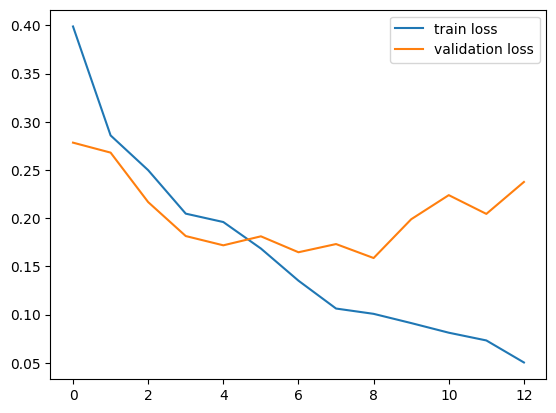

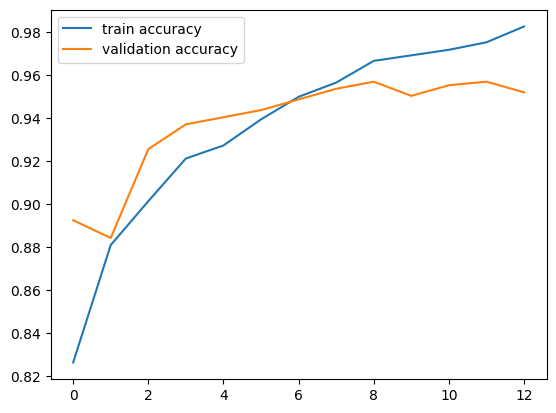

In [136]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [137]:
#save the model
import pickle
model.save('mask_detection_model.model',save_format='h5')


**Prediction**


1/1 [==============================] - 0s 17ms/step
[[0.01329422 0.99993604]]
1
The person in the image is wearing a mask


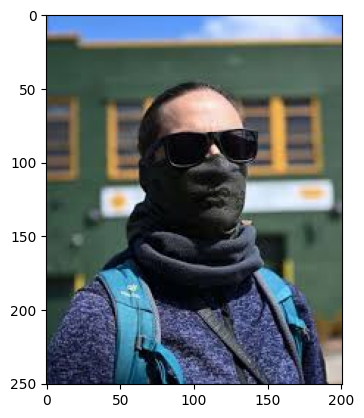

In [139]:
input_image = mpimg.imread("C:\\Users\\niraj\\PycharmProjects\\mask detection\\data\\with_mask\\with_mask_28.jpg")
imgplot = plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

1/1 [==============================] - 0s 22ms/step
[[0.9997922  0.00674158]]
0
The person in the image is not wearing a mask


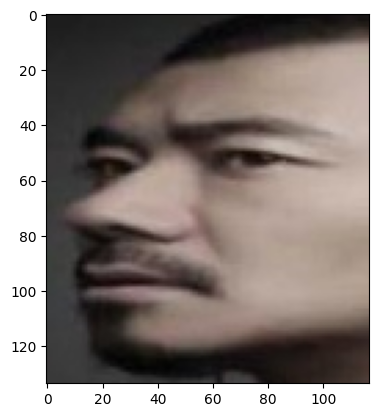

In [142]:
input_image = mpimg.imread("C:\\Users\\niraj\\PycharmProjects\\mask detection\\data\\without_mask\\without_mask_14.jpg")
imgplot = plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')